In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from os import write
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from ResnetModels import ResNet, ResNet50

In [3]:
def load_history(history_dir):
    data = {}
    with open(history_dir) as infile:
        data = json.load(infile)
    return data
def smooth_data(x, kernel=5):
    ret_val = []
    pad = (kernel - 1) / 2
    pad = int(pad)
    base, append = [0]*pad, [0]*pad
    base.extend(x)
    base.extend(append)
    for i in range(pad, len(base)-pad):
        low, high = i - pad, i + pad + 1
        count = 0
        subsequence = base[low:high]
        for s in subsequence:
            if s > 0:
                count += 1
        s = np.sum(subsequence)
        ret_val.append(s/count)
    return ret_val

In [4]:
orig_data = load_history('results/resnet50_no_l2_100eps.json')
data = load_history('results/resnet50_l2.json')

In [14]:
print(data.keys())

dict_keys(['loss', 'acc'])


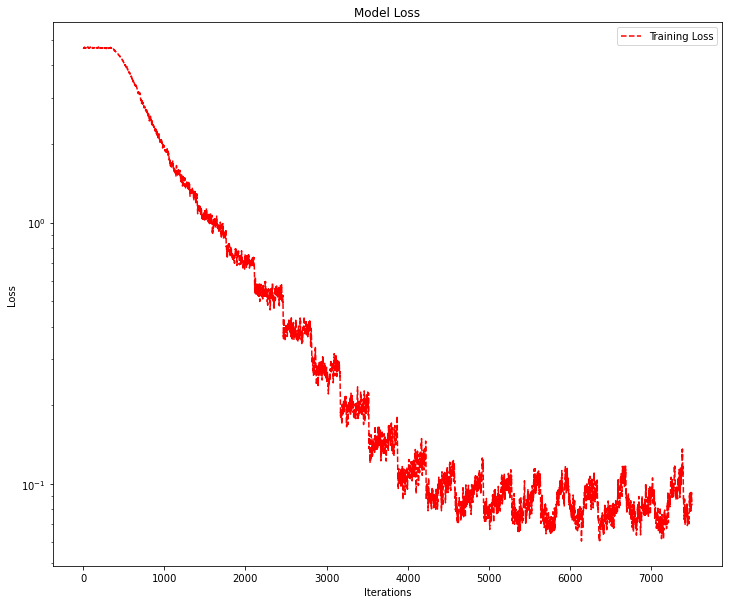

In [19]:
plot_data = smooth_data(data['loss']['train_iter'], kernel=7)[0:7500]
test_data = smooth_data(data['loss']['test_iter'], kernel=7)[0:7500]
num_points = len(plot_data)
plt.figure(figsize=(12, 10))
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.plot(range(num_points), plot_data, 'r--', label='Training Loss')
#plt.plot(range(num_points), plot_data, 'b--', label='Test Loss')
plt.legend()
plt.show()

[0.011570411392405063, 0.4332476265822785, 0.6324169303797469, 0.7252768987341772, 0.762559335443038, 0.7825356012658228, 0.7828322784810127, 0.7941060126582279, 0.7966772151898734, 0.7932159810126582, 0.7937104430379747, 0.7940071202531646, 0.7937104430379747, 0.7857001582278481, 0.7868868670886076, 0.7855023734177216, 0.780557753164557, 0.7885680379746836, 0.7807555379746836, 0.7768987341772152, 0.7645371835443038, 0.7794699367088608, 0.7770965189873418, 0.7754153481012658, 0.7763053797468354, 0.7762064873417721, 0.764932753164557, 0.7872824367088608, 0.7767009493670886, 0.7634493670886076]


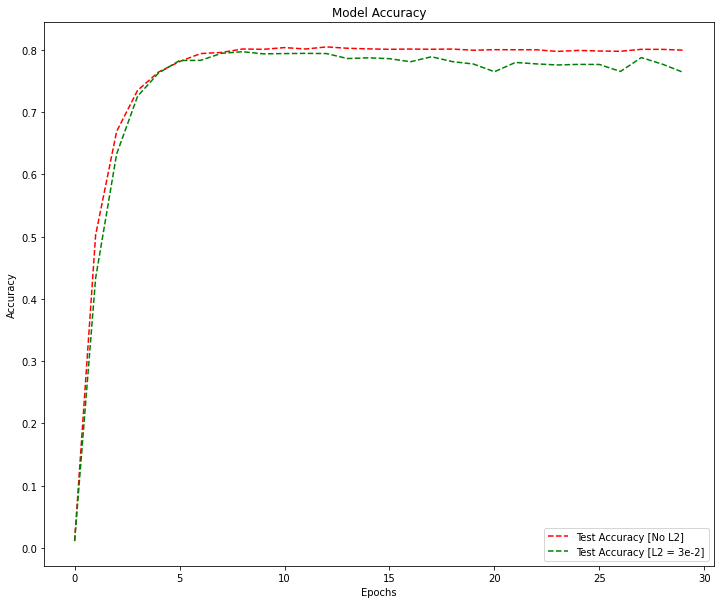

In [12]:
# train_acc = data['acc']['train'][0:30]
test_acc = data['acc']['test'][0:30]
test_acc_orig = orig_data['acc']['test'][0:30]
print(test_acc)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(num_points), test_acc_orig, 'r--', label='Test Accuracy [No L2]')
plt.plot(range(num_points), test_acc, 'g--', label='Test Accuracy [L2 = 3e-2]')
plt.legend()
plt.show()

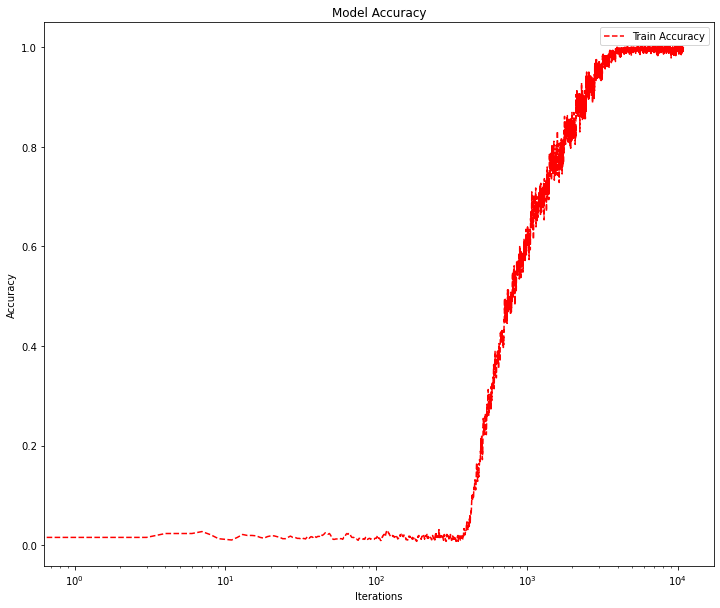

In [21]:
train_acc = smooth_data(data['acc']['train_iter'])
num_train = len(train_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(range(num_train), train_acc, 'r--', label='Train Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

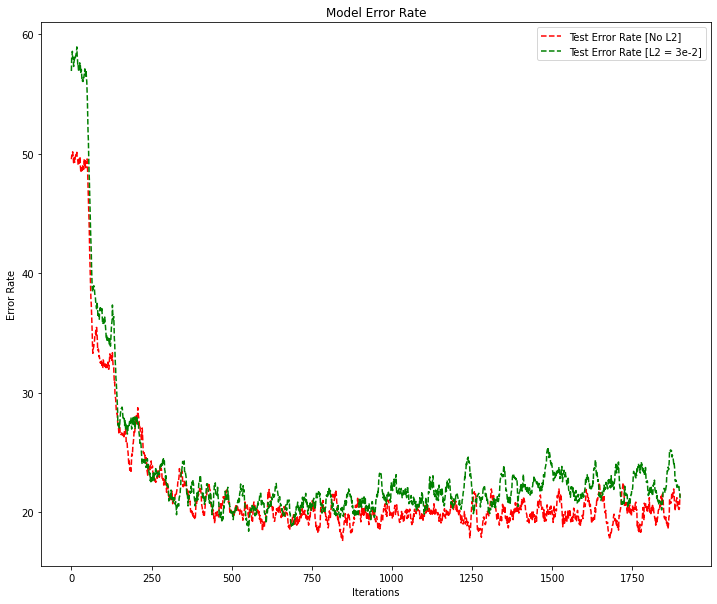

In [22]:
# train_acc = data['acc']['train'][0:30]
test_acc = smooth_data((1-np.array(data['acc']['test_iter'][100:2000]))*100, kernel=17)
test_acc_orig = smooth_data((1-np.array(orig_data['acc']['test_iter'][100:2000]))*100, kernel=17)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.plot(range(num_points), test_acc_orig, 'r--', label='Test Error Rate [No L2]')
plt.plot(range(num_points), test_acc, 'g--', label='Test Error Rate [L2 = 3e-2]')
plt.legend()
plt.show()

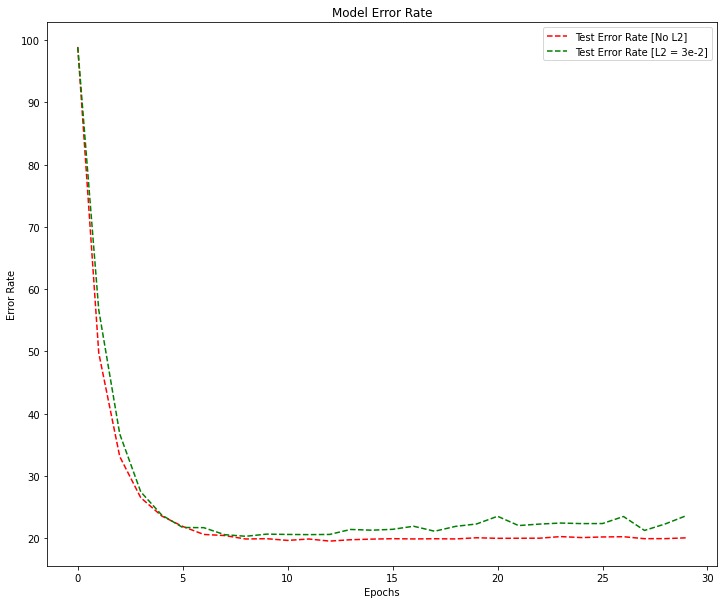

In [37]:
# train_acc = data['acc']['train'][0:30]
start_point = 0
end_point = 30
test_acc = smooth_data((1-np.array(data['acc']['test'][start_point:end_point]))*100, kernel=1)
test_acc_orig = smooth_data((1-np.array(orig_data['acc']['test'][start_point:end_point]))*100, kernel=1)
#test_acc = (1-np.array(data['acc']['test'][start_point:end_point]))*100
#test_acc_orig = (1-np.array(orig_data['acc']['test'][start_point:end_point]))*100
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.plot(range(start_point, end_point), test_acc_orig, 'r--', label='Test Error Rate [No L2]')
plt.plot(range(start_point, end_point), test_acc, 'g--', label='Test Error Rate [L2 = 3e-2]')
plt.legend()
plt.show()

In [40]:
print([i for i in range(2)])

[0, 1]
